<a href="https://colab.research.google.com/github/FaQ2108/Trading-Algoritmico-con-SmallCaps/blob/main/Estrategia0_Parametros_Ideales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mysql-connector-python
!pip install optuna
!pip install pymysql
!pip install ipython
import mysql.connector
import pandas as pd
from sqlalchemy import create_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.0/34.0 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.6 MB/s eta 0:00:00


In [ ]:
# Invocar Script de limpieza y filtrado de la bbdd.
%run /content/drive/MyDrive/Proyecto_SmallCaps/BBDD/limpieza_y_filtrado_bbdd.py

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Introduce el host de la base de datos: librobot.org
Introduce el usuario de la base de datos: repropel
Introduce la contraseña de la base de datos: YeiTh5thoodi
Introduce el nombre de la base de datos: smallcaps
Conexión establecida correctamente.
Valores nulos antes de la limpieza (vista_datos_completos):
ticker            0
id_event          0
fecha             0
percent_var       0
ratio_vol         0
precio            3
volumen           0
spread           45
insercion         0
anterior          0
apertura          0
float_shares    188
exchange        133
country         133
avg_volume      133
shs_outstand    138
market_cap      134
inst_own        133
short_float     188
dtype: int64
Valores nulos después de la limpieza (vista_datos_completos):
ticker           0
id_event         0
fecha            0
percent_var      0
ratio_vol        0
precio       

In [ ]:
# Acceder a la tabla OHLCData del archivo.h5
from sklearn.model_selection import train_test_split
import pandas as pd

# Reemplaza 'ruta/al/archivo.h5' con la ruta real de tu archivo HDF5
try:
  df = pd.read_hdf('/content/drive/MyDrive/Proyecto_SmallCaps/BBDD/bbdd_filtrada.h5', key='vista_datos_completos')

  # Convertir la columna 'fecha' a formato datetime si no lo está
  df['fecha'] = pd.to_datetime(df['fecha'])

  # Ordenar por fecha de manera ascendente (más antiguo a más reciente)
  df = df.sort_values(by='fecha')

  # Dividir el DataFrame en 60% y 40%
  df_60, df_temp = train_test_split(df, test_size=0.40, random_state=42, shuffle=False)

  # Dividir el 40% restante en dos partes de 20% cada una
  df_20, df_20_restante = train_test_split(df_temp, test_size=0.50, random_state=42, shuffle=False)

  # Verificar tamaños
  print(f'Tamaño df_60: {len(df_60)}')
  print(f'Tamaño df_20: {len(df_20)}')
  print(f'Tamaño df_20_restante: {len(df_20_restante)}\n')
  print(df_60)  # Muestra las primeras filas del DataFrame
  print(df_20)  # Muestra las primeras filas del DataFrame
  print(df_20_restante)  # Muestra las primeras filas del DataFrame

except FileNotFoundError:
  print("Error: El archivo HDF5 no se encontró en la ruta especificada.")
except KeyError:
    print("Error: La tabla 'OHLCData' no se encontró en el archivo HDF5.")
except Exception as e:
  print(f"Ocurrió un error inesperado: {e}")

Tamaño df_60: 377
Tamaño df_20: 126
Tamaño df_20_restante: 126

    ticker  id_event               fecha  percent_var  ratio_vol  precio  \
0     GNLN         1 2025-01-15 14:33:00        10.26       3.52    1.72   
1     VCIG         3 2025-01-15 14:38:49        18.97       3.45    2.32   
2     XRTX         7 2025-01-15 14:55:55       -35.43       3.25    0.82   
3     QLGN         8 2025-01-15 14:56:32        -2.47       3.24    3.95   
4     EPRX         9 2025-01-15 14:59:37        48.03       3.21    4.50   
..     ...       ...                 ...          ...        ...     ...   
372   WLDS      1415 2025-01-31 15:57:37        27.57       2.69    1.14   
373   GAIA      1416 2025-01-31 15:59:44       -11.64       2.67    5.16   
374   CMTL      1417 2025-01-31 16:06:15        -6.19       2.62    1.97   
375   AKTX      1418 2025-01-31 16:07:39         2.96       3.91    1.39   
376   KDLY      1421 2025-01-31 16:13:42         3.82       2.96    1.36   

     volumen  spread   

In [ ]:
# Verificar el valor mas actual de la columna fecha:
df_60['fecha'].max()

# Asegurar que la columna 'fecha' sea de tipo datetime
df_60['fecha'] = pd.to_datetime(df_60['fecha'])

# Extraer solo la fecha (sin hora) y contar los valores únicos
num_dias = df_60['fecha'].dt.date.nunique()

print(f"El DataFrame contiene {num_dias} días únicos.")



El DataFrame contiene 12 días únicos.


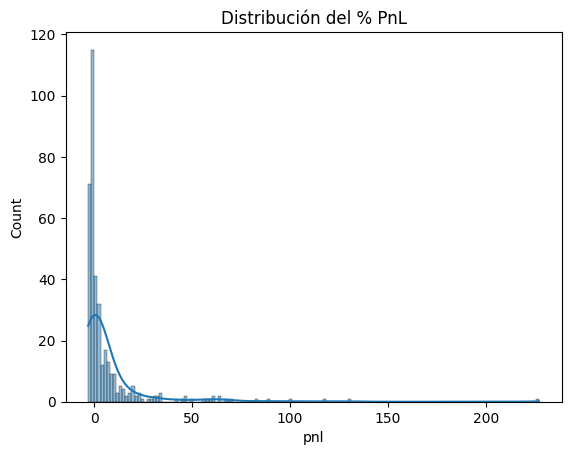

In [ ]:
# Visualizar la distribución del PnL:
import seaborn as sns
import matplotlib.pyplot as plt
vista_datos_completos = df_60
sns.histplot(vista_datos_completos['pnl'], kde=True)
plt.title("Distribución del % PnL")
plt.show()

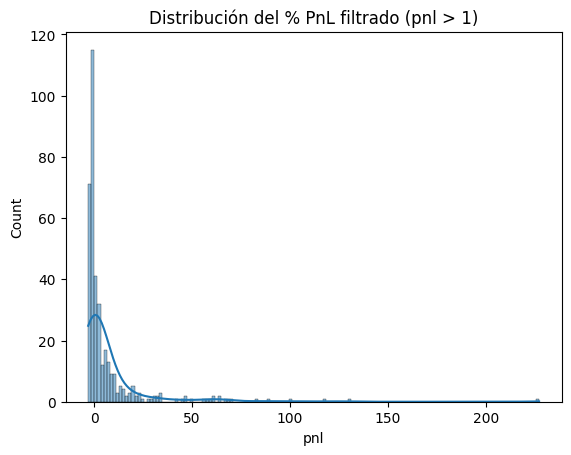

In [ ]:
# 1. Excluir valores cercanos a cero:

filtered_data = vista_datos_completos[vista_datos_completos['pnl'] > -50]
sns.histplot(filtered_data['pnl'], kde=True)
plt.title("Distribución del % PnL filtrado (pnl > 1)")
plt.show()

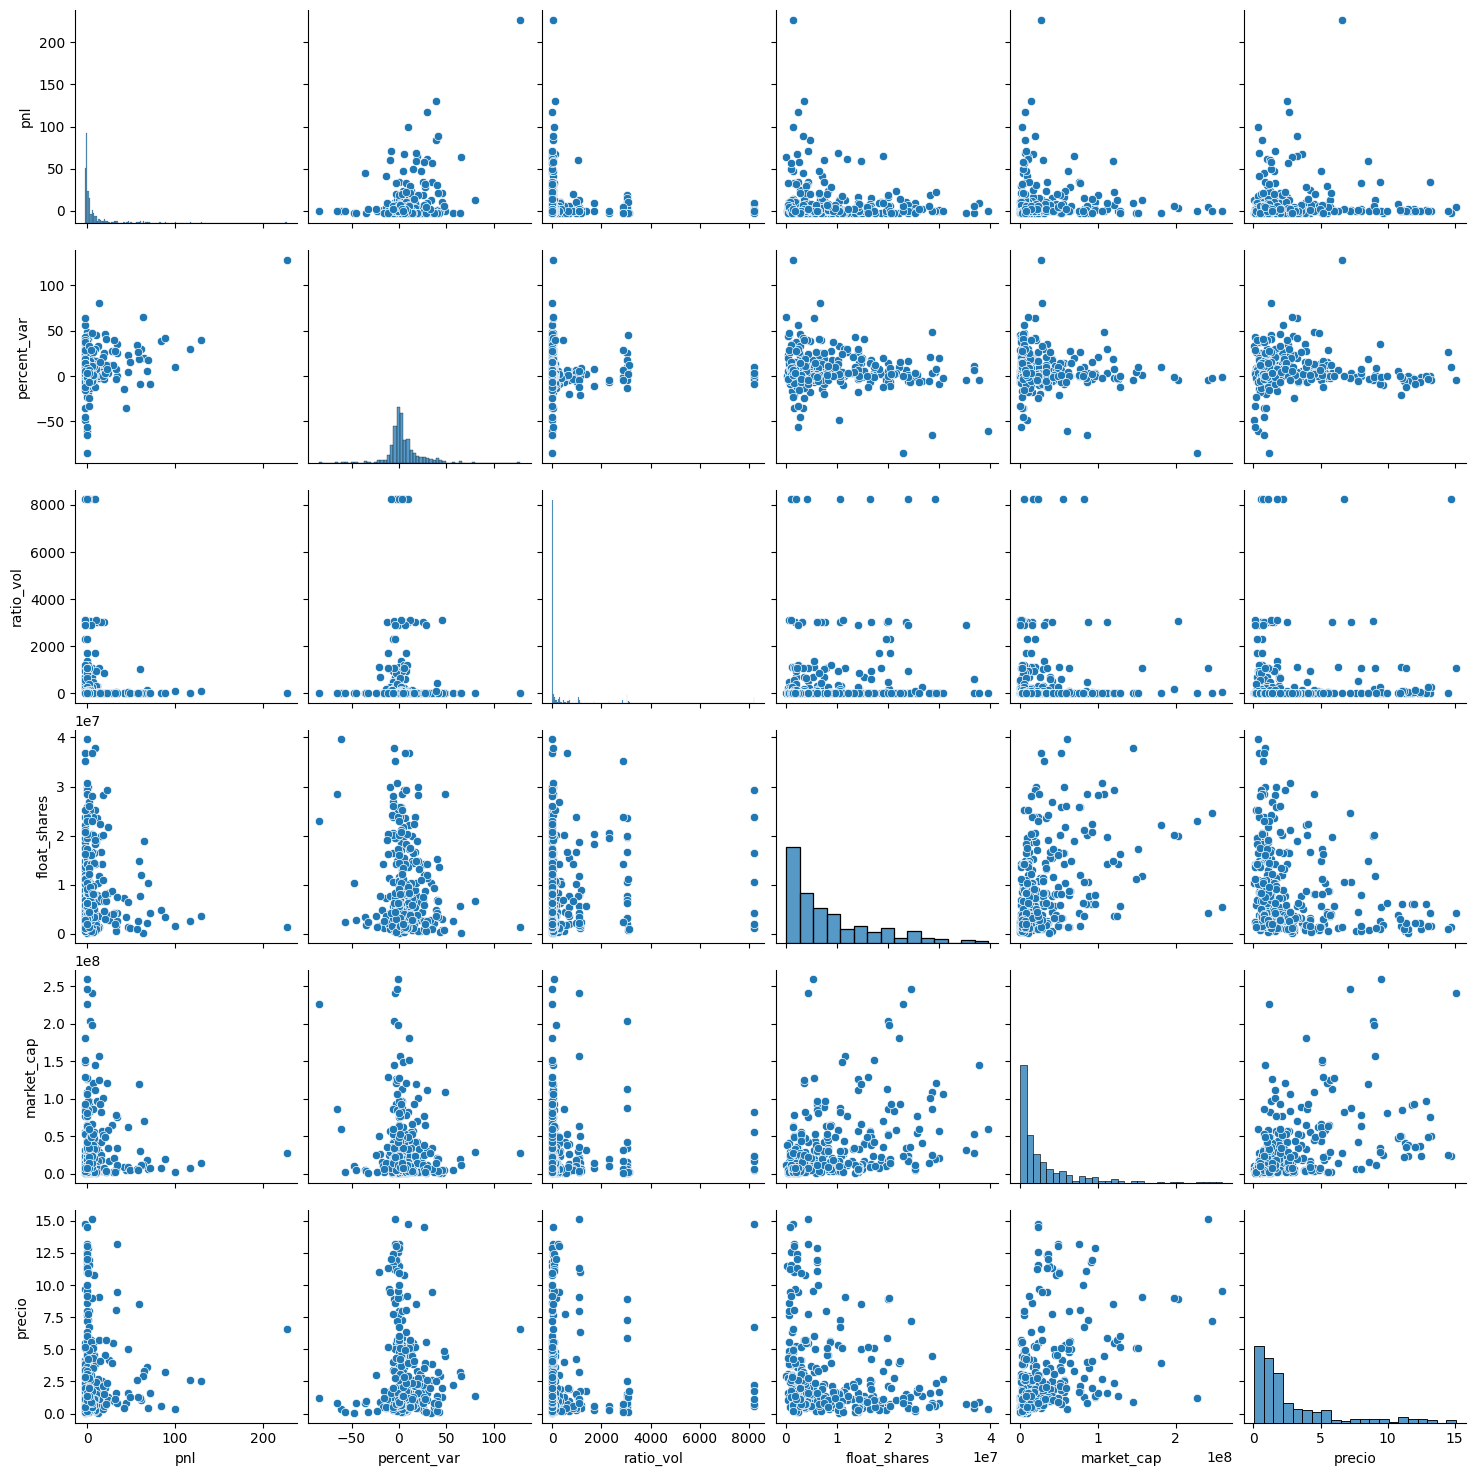

Matriz de Correlación:
                   pnl  percent_var  ratio_vol  float_shares  market_cap  \
pnl           1.000000     0.411906  -0.067706     -0.086294   -0.022207   
percent_var   0.411906     1.000000  -0.043993     -0.124079   -0.142461   
ratio_vol    -0.067706    -0.043993   1.000000      0.091970    0.002342   
float_shares -0.086294    -0.124079   0.091970      1.000000    0.379432   
market_cap   -0.022207    -0.142461   0.002342      0.379432    1.000000   
precio        0.021754     0.001266   0.008755     -0.230641    0.437118   

                precio  
pnl           0.021754  
percent_var   0.001266  
ratio_vol     0.008755  
float_shares -0.230641  
market_cap    0.437118  
precio        1.000000  


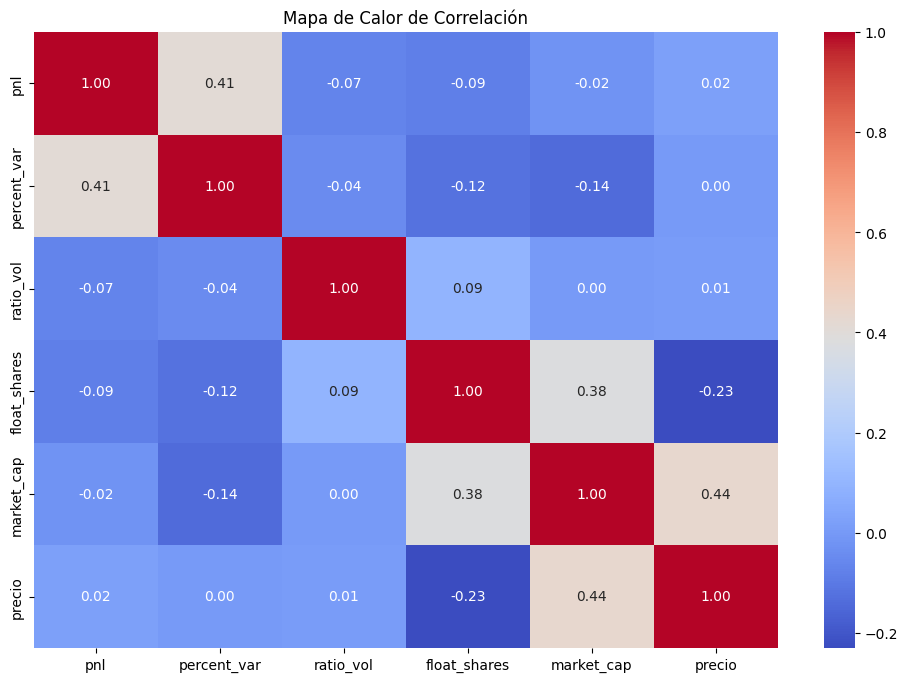

In [ ]:
# Correlacion con demas metricas:
sns.pairplot(vista_datos_completos[['pnl', 'percent_var', 'ratio_vol', 'float_shares', 'market_cap', 'precio']])
plt.show()

# Calcular la matriz de correlación
correlation_matrix = vista_datos_completos[['pnl', 'percent_var', 'ratio_vol', 'float_shares', 'market_cap', 'precio']].corr()

print("Matriz de Correlación:")
print(correlation_matrix)

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de Correlación")
plt.show()

## Buscamos con Optuna los valores que maximizan el PnL con el 60% de datos de la BBDD

In [ ]:
# Instalar y cargar dependencias
!pip install optuna

from IPython.display import display, HTML
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances

# ------------------------------
# Carga de datos desde el archivo HDF5
# ------------------------------
#file_path = '/content/drive/MyDrive/Proyecto_SmallCaps/BBDD/bbdd_filtrada.h5'
#vista_datos_completos = pd.read_hdf(file_path, key='vista_datos_completos')

# Ordenar el DataFrame por fecha para respetar la secuencia temporal
#vista_datos_completos = vista_datos_completos.sort_values(by="fecha")

# ------------------------------
# División del DataFrame en 60% Entrenamiento, 20% Test y 20% Validación
# ------------------------------
n_total = len(vista_datos_completos)
#train_end = int(0.60 * n_total)
#test_end  = int(0.80 * n_total)  # 60% entrenamiento + 20% test = 80%

train_data = df_60
#train_data = vista_datos_completos.iloc[:train_end]
#test_data  = vista_datos_completos.iloc[train_end:test_end]
#val_data   = vista_datos_completos.iloc[test_end:]

print(f"Total de registros: {n_total}")
print(f"Entrenamiento: {len(train_data)} registros")
#print(f"Test: {len(test_data)} registros")
#print(f"Validación: {len(val_data)} registros")

# ------------------------------
# Función objetivo para Optuna usando solo el conjunto de entrenamiento
# ------------------------------
def objective(trial):
    # Se definen los hiperparámetros con rangos ajustados a la distribución de los datos
    percent_var_threshold = trial.suggest_float("percent_var_threshold", -150.0, 200.0)
    ratio_vol_threshold   = trial.suggest_float("ratio_vol_threshold", 2.0, 50.0)
    float_shares_threshold = trial.suggest_float("float_shares_threshold", 1_000_000.0, 20_000_000.0)
    market_cap_threshold   = trial.suggest_float("market_cap_threshold", 100_000.0, 30_000_000.0)

    # Aplicar los filtros en el conjunto de entrenamiento
    filtered_events = train_data[
        (train_data['percent_var'] > percent_var_threshold) &
        (train_data['ratio_vol'] > ratio_vol_threshold) &
        (train_data['float_shares'] > float_shares_threshold) &
        (train_data['market_cap'] > market_cap_threshold)
    ]

    # Si no se selecciona ningún trade, retornamos 0 para penalizar esa configuración
    if filtered_events.empty:
        return 0

    # Contar la cantidad de trades con pnl positivo
    positive_count = (filtered_events['pnl'] > 0).sum()
    return positive_count

# ------------------------------
# Creación y ejecución del estudio de Optuna
# ------------------------------
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=200)  # Ajustar el número de trials según convenga

# Mostrar los mejores parámetros y el resultado en entrenamiento
print("Mejores parámetros encontrados:", study.best_params)
print("Máxima cantidad de trades positivos en entrenamiento:", study.best_value)

# ------------------------------
# Evaluación de los mejores parámetros en los tres conjuntos
# ------------------------------
def evaluate_parameters(data, params):
    filtered = data[
        (data['percent_var'] > params["percent_var_threshold"]) &
        (data['ratio_vol'] > params["ratio_vol_threshold"]) &
        (data['float_shares'] > params["float_shares_threshold"]) &
        (data['market_cap'] > params["market_cap_threshold"])
    ]
    positive_count = (filtered['pnl'] > 0).sum()
    total_trades = len(filtered)
    return positive_count, total_trades


best_params = study.best_params

train_positive, train_total = evaluate_parameters(train_data, best_params)
# test_positive, test_total   = evaluate_parameters(test_data, best_params)
# val_positive, val_total     = evaluate_parameters(val_data, best_params)



# ------------------------------
# Guardar resultados en un diccionario
# ------------------------------
resultados = {
    "mejores_parametros": best_params,
    "trades_positivos": {
        "entrenamiento": train_positive,
       # "test": test_positive,
       # "validacion": val_positive,
    },
    "trades_filtrados": {
        "entrenamiento": train_total,
     #   "test": test_total,
     #   "validacion": val_total,
    },
    "importancias": {
        "percent_var_threshold": 0,
        "float_shares_threshold": 0,
        "ratio_vol_threshold": 0,
        "market_cap_threshold": 0,
    }
}

# Cálculo de la importancia de los parámetros (si aplica)
trial_values = [trial.value for trial in study.trials if trial.value is not None]
if len(set(trial_values)) > 1:
    importancias = optuna.importance.get_param_importances(study)
    resultados["importancias"] = {
        "percent_var_threshold": importancias.get("percent_var_threshold", 0) * 100,
        "float_shares_threshold": importancias.get("float_shares_threshold", 0) * 100,
        "ratio_vol_threshold": importancias.get("ratio_vol_threshold", 0) * 100,
        "market_cap_threshold": importancias.get("market_cap_threshold", 0) * 100,
    }
else:
    print("No se pudo calcular la importancia de los parámetros por falta de variación en la función objetivo.")

# ------------------------------
# Visualizaciones
# ------------------------------
# Gráfico de historia de optimización
fig1 = plot_optimization_history(study)
fig1.show()

# Visualización de importancias (si hay variación en la métrica objetivo)
if len(set(trial_values)) > 1:
    fig2 = plot_param_importances(study)
    fig2.show()
else:
    print("No se pudo calcular la importancia de los parámetros por falta de variación en la función objetivo.")

# Generar reporte en formato Markdown
def generar_reporte_markdown(best_params, train_performance, importance_data):
    # Crear el reporte en formato HTML
    report = f"""
    <h1>Análisis de los Resultados</h1>

    <h2>Mejores parámetros encontrados:</h2>
    <ul>
        <li><strong>percent_var_threshold</strong>: {best_params["percent_var_threshold"]:.2f}</li>
        <li><strong>ratio_vol_threshold</strong>: {best_params["ratio_vol_threshold"]:.2f}</li>
        <li><strong>float_shares_threshold</strong>: {int(best_params["float_shares_threshold"]):,}</li>
        <li><strong>market_cap_threshold</strong>: {int(best_params["market_cap_threshold"]):,}</li>
    </ul>

    <h3>Interpretación:</h3>
    <p>
        Estos parámetros representan los valores óptimos encontrados por Optuna para filtrar el dataset de small caps y maximizar la cantidad de trades con pnl positivo. Por ejemplo:
    </p>
    <ul>
        <li>Solo se consideran acciones con <code>percent_var</code> superior a {best_params["percent_var_threshold"]:.2f}. Esto implica que se incluyen acciones con grandes caídas recientes, ya que valores negativos elevados indican pérdidas fuertes.</li>
        <li><code>ratio_vol_threshold</code> en {best_params["ratio_vol_threshold"]:.2f} significa que estamos buscando acciones con volumen actual ligeramente más alto que el volumen promedio, pero no exageradamente alto.</li>
        <li>El umbral de <code>float_shares</code> y <code>market_cap</code> sugiere que se priorizan acciones con flotante muy bajo y capitalización de mercado pequeña, típicas de estrategias en small caps.</li>
    </ul>

    <h2>Rendimiento Máximo:</h2>
    <ul>
        <li><strong>Máxima cantidad de trades positivos en entrenamiento</strong>: {train_performance[0]} trades de {train_performance[1]} trades filtrados.</li>
    </ul>

    <h2>Observaciones:</h2>
    <ol>
        <li>El máximo número de trades positivos se alcanzó en el conjunto de entrenamiento con un total de <strong>{train_performance[0]}</strong>.</li>
    </ol>

    <h3>Gráficos Proporcionados:</h3>
    <ul>
        <li><strong>Optimization History Plot</strong>: Muestra cómo fue mejorando la métrica objetivo con cada intento.
            <ul>
                <li>Los puntos azules representan el número de trades positivos alcanzados en cada prueba.</li>
                <li>La línea roja muestra el mejor valor alcanzado hasta ese punto.</li>
            </ul>
        </li>
        <li><strong>Hyperparameter Importances</strong>:
            <ul>
    """

    # Añadir la importancia de los hiperparámetros
    for param, importance in importance_data.items():
        report += f"            <li><strong>{param}</strong>: {importance:.1%}</li>\n"

    report += """
            </ul>
        </li>
    </ul>

    <p>
        Estos resultados tienen sentido desde el punto de vista del trading algorítmico en small caps debido a:
    </p>
    <ul>
        <li><strong>Alta volatilidad</strong>: Se incluyen acciones con caídas significativas (alta negatividad en <code>percent_var</code>), ideales para estrategias de reversión.</li>
        <li><strong>Bajo float y baja capitalización</strong>: Este perfil es típico de acciones que experimentan movimientos de precio significativos.</li>
        <li><strong>Volumen ligeramente superior al promedio</strong>: Indica interés reciente en la acción sin saturación del mercado.</li>
    </ul>
    """

    # Mostrar el reporte en formato HTML
    display(HTML(report))

# Datos dinámicos del reporte
train_performance = (train_positive, train_total)
# test_performance = (test_positive, test_total)
# val_performance = (val_positive, val_total)

# Importancia de los hiperparámetros
param_importances = optuna.importance.get_param_importances(study)

  # Verificar tamaños
  print(f'Tamaño df_60: {len(df_60)}')
  print(f'Tamaño df_20: {len(df_20)}')
  print(f'Tamaño df_20_restante: {len(df_20_restante)}\n')
  print(df_60)  # Muestra las primeras filas del DataFrame
  print(df_20)  # Muestra las primeras filas del DataFrame
  print(df_20_restante)  # Muestra las primeras filas del DataFrame


[I 2025-02-09 08:42:39,101] A new study created in memory with name: no-name-eeb8fd05-c39a-46cc-a9fd-5955e3dc7171
[I 2025-02-09 08:42:39,108] Trial 0 finished with value: 0.0 and parameters: {'percent_var_threshold': 148.31589907478167, 'ratio_vol_threshold': 9.700739608427899, 'float_shares_threshold': 15003516.912126781, 'market_cap_threshold': 21689205.824235257}. Best is trial 0 with value: 0.0.
[I 2025-02-09 08:42:39,114] Trial 1 finished with value: 30.0 and parameters: {'percent_var_threshold': -45.907915275104614, 'ratio_vol_threshold': 6.658275656955567, 'float_shares_threshold': 6008027.339469694, 'market_cap_threshold': 17084421.952925354}. Best is trial 1 with value: 30.0.
[I 2025-02-09 08:42:39,120] Trial 2 finished with value: 1.0 and parameters: {'percent_var_threshold': 37.241956958142936, 'ratio_vol_threshold': 31.296522627175804, 'float_shares_threshold': 3027115.5952049484, 'market_cap_threshold': 7835297.514509662}. Best is trial 1 with value: 30.0.
[I 2025-02-09 08

Total de registros: 355
Entrenamiento: 355 registros


[I 2025-02-09 08:42:39,310] Trial 15 finished with value: 6.0 and parameters: {'percent_var_threshold': 1.7908502227955765, 'ratio_vol_threshold': 13.565962191516874, 'float_shares_threshold': 4985572.860598706, 'market_cap_threshold': 27352219.81948369}. Best is trial 1 with value: 30.0.
[I 2025-02-09 08:42:39,336] Trial 16 finished with value: 15.0 and parameters: {'percent_var_threshold': -87.32087027342403, 'ratio_vol_threshold': 38.54647868889347, 'float_shares_threshold': 8236359.408446923, 'market_cap_threshold': 20684332.945005663}. Best is trial 1 with value: 30.0.
[I 2025-02-09 08:42:39,362] Trial 17 finished with value: 1.0 and parameters: {'percent_var_threshold': 32.65743815015543, 'ratio_vol_threshold': 27.798331004202435, 'float_shares_threshold': 1254220.3361525433, 'market_cap_threshold': 13038343.390129885}. Best is trial 1 with value: 30.0.
[I 2025-02-09 08:42:39,387] Trial 18 finished with value: 11.0 and parameters: {'percent_var_threshold': -39.36858435020639, 'ra

Mejores parámetros encontrados: {'percent_var_threshold': -140.24649701143312, 'ratio_vol_threshold': 2.0346534458021504, 'float_shares_threshold': 1434695.2461124223, 'market_cap_threshold': 117226.06725071184}
Máxima cantidad de trades positivos en entrenamiento: 153.0


In [ ]:
# Generar y mostrar el reporte en Markdown
reporte_markdown = generar_reporte_markdown(best_params, train_performance, param_importances)
print(reporte_markdown)

None


# Datos de los parametros

In [ ]:
percent_var_max = 500
percent_var_min = -40
ratio_vol = 1500
float_shares = 3000000
market_cap = 300000000


---

## Filtrado de valores con el 60% de los datos de la BBDD

In [ ]:
#import optuna
from IPython.display import display, Markdown, HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from optuna.visualization import plot_optimization_history, plot_param_importances


# ------------------------------
# Carga de datos desde el archivo HDF5
# ------------------------------
#file_path = '/content/drive/MyDrive/Proyecto_SmallCaps/BBDD/bbdd_filtrada.h5'
#vista_datos_completos = pd.read_hdf(file_path, key='vista_datos_completos')

vista_datos_completos_60 = df_60

# ------------------------------
# Filtrar el DataFrame original con los mejores parámetros
# ------------------------------


filtered_events_60 = vista_datos_completos_60[
    (vista_datos_completos_60['percent_var'] < percent_var_max) &
    (vista_datos_completos_60['percent_var'] > percent_var_min) &
    (vista_datos_completos_60['ratio_vol'] < ratio_vol) &
    (vista_datos_completos_60['float_shares'] < float_shares) &
    (vista_datos_completos_60['precio'] < 10 ) &
    (vista_datos_completos_60['market_cap'] < market_cap)
].copy()



# filtered_events_20 = vista_datos_completos_20[
#     (vista_datos_completos_20['percent_var'] < best_params['percent_var_threshold']) &
#     (vista_datos_completos_20['ratio_vol'] < best_params['ratio_vol_threshold']) &
#     (vista_datos_completos_20['float_shares'] < best_params['float_shares_threshold']) &
#     (vista_datos_completos_20['market_cap'] < best_params['market_cap_threshold'])
# ].copy()

# print(best_params["percent_var_threshold"])
# print(best_params["ratio_vol_threshold"])
# print(best_params["float_shares_threshold"])
# print(best_params["market_cap_threshold"])


# Verificar si hay datos en test_data
if filtered_events_60.empty:
    print("Advertencia: No hay datos en test_data después de aplicar los filtros.")
else:
    # Verificar si hay valores en la columna 'pnl_percent'
    if filtered_events_60['pnl'].empty:
        print("Advertencia: La columna 'pnl' está vacía.")
    else:
        # Asegúrate de que la columna 'date' esté en formato datetime
        filtered_events_60.loc[:, 'fecha'] = pd.to_datetime(filtered_events_60['fecha'])

        # Contar días únicos en los que hay datos de OHLC disponibles
        # Asegurar que la columna 'fecha' sea de tipo datetime
        unique_ohlc_dates = filtered_events_60['fecha'].dt.date.nunique()
        num_days_ohlc_analyzed = unique_ohlc_dates

        # Filtrar operaciones ganadoras y perdedoras
        winning_trades = filtered_events_60[filtered_events_60['pnl'] > 0]  # DataFrame con operaciones ganadoras
        losing_trades = filtered_events_60[filtered_events_60['pnl'] <= 0]  # DataFrame con operaciones perdedoras

        # Calcular métricas de rendimiento
        total_trades = len(filtered_events_60)
        num_winning_trades = len(winning_trades)
        num_losing_trades = len(losing_trades)

        # Inicialización de métricas
        total_gains_percent = winning_trades['pnl'].sum() if not winning_trades.empty else 0
        total_losses_percent = abs(losing_trades['pnl'].sum()) if not losing_trades.empty else 0
        net_profit_percentage = filtered_events_60['pnl'].sum() if total_trades > 0 else 0
        win_rate = (num_winning_trades / total_trades * 100) if total_trades > 0 else 0
        average_pnl_percentage = net_profit_percentage / total_trades if total_trades > 0 else 0
        profit_factor = total_gains_percent / total_losses_percent if total_losses_percent > 0 else float('inf')

        # Calcular la moda de las ganancias/pérdidas
        most_frequent_pnl = filtered_events_60['pnl'].mode()
        most_frequent_pnl = most_frequent_pnl[0] if not most_frequent_pnl.empty else 0

        # Calcular importe mínimo necesario por trade
        pnl_percent_medio = filtered_events_60['pnl'].mean() if total_trades > 0 else 0
        comision_total = 3.8  # Ejemplo de comisión total por operación
        importe_minimo = (comision_total * 100) / pnl_percent_medio if pnl_percent_medio != 0 else 0

        # Calcular el Ratio de Ganancia/Perdida (Win/Loss Ratio)
        win_loss_ratio = num_winning_trades / num_losing_trades if num_losing_trades > 0 else float('inf')

        # Rendimiento promedio de las operaciones perdedoras
        average_loss_percentage = losing_trades['pnl'].mean() if num_losing_trades > 0 else 0

        def calculate_expected_shortfall(returns, confidence_level=0.95):
            """
            Calcula el Expected Shortfall (ES) para un conjunto de retornos

            Parameters:
            returns (array-like): Serie de retornos
            confidence_level (float): Nivel de confianza (por defecto 0.95)

            Returns:
            float: Expected Shortfall
            """
            if len(returns) == 0:
                return 0

            # Ordenar los retornos de menor a mayor
            sorted_returns = np.sort(returns)

            # Calcular el índice correspondiente al VaR
            cutoff_index = int((1 - confidence_level) * len(sorted_returns))

            # Calcular ES como el promedio de los retornos por debajo del VaR
            es = sorted_returns[:cutoff_index].mean() if cutoff_index > 0 else sorted_returns[0]

            return es

        # Calcular VaR y ES
        confidence_levels = [0.95, 0.99]  # Puedes ajustar los niveles de confianza
        var_metrics = {}
        es_metrics = {}

        for conf_level in confidence_levels:
            returns = filtered_events_60['pnl'].values

            # Calcular VaR
            var = np.percentile(returns, (1 - conf_level) * 100)
            var_metrics[conf_level] = var

            # Calcular ES
            es = calculate_expected_shortfall(returns, conf_level)
            es_metrics[conf_level] = es

        # Formateo de resultados
        metrics = [
            ("Porcentaje de la bbdd", "60%"),
            ("Total de eventos registrados", len(df_60)),
            ("Total de Trades filtrados", total_trades),
            ("Winning Trades", f"{num_winning_trades} ({win_rate:.2f}%)"),
            ("Losing Trades", f"{num_losing_trades} ({100 - win_rate:.2f}%)"),
            ("Net Profit%", f"{net_profit_percentage:.2f}%"),
            ("Average PNL%", f"{average_pnl_percentage:.2f}%"),
            ("Profit Factor", f"{profit_factor:.2f}"),
            ("Win/Loss Ratio", f"{win_loss_ratio:.2f}"),
            ("Moda de PNL%", f"{most_frequent_pnl:.2f}%"),
            ("Average Loss%", f"{average_loss_percentage:.2f}%"),
            ("Cantidad de días analizados", num_days_ohlc_analyzed),
            ("Importe mínimo necesario por trade", f"${importe_minimo:.2f}"),
        ]

        # Añadir métricas de VaR y ES
        for conf_level in confidence_levels:
            metrics.extend([
                (f"VaR ({conf_level*100}%)", f"{var_metrics[conf_level]:.2f}%"),
                (f"Expected Shortfall ({conf_level*100}%)", f"{es_metrics[conf_level]:.2f}%")
            ])


        # Crear la tabla Markdown
        markdown_table = "|    **Métrica**        |    **Valor**           |\n"
        markdown_table += "|-----------------------|------------------------|\n"

        # Añadir las filas de la tabla
        for metric, value in metrics:
            markdown_table += f"| {metric} | {value} |\n"

        # Mostrar la tabla en Markdown
        display(Markdown(markdown_table))

        # Generar la tabla en HTML (si ya tienes una tabla en Markdown, usa una función para convertirla a HTML)
        html_table = "<table>...</table>"  # Asegúrate de convertir correctamente tu tabla de Markdown a HTML.


        # Texto dinámico con los valores de las variables en formato Markdown
        markdown_text = f"""
        <h1>Interpretación de los Resultados del 60% de la muestra correspondientes al Entrenamiento:</h1>

        <ul>
            <li><b>Total de eventos registrados:</b> {len(df_60)}
                <ul>
                    <li>Se generaron un total de {len(df_60)} señales de entrada basadas en las condiciones de la estrategia.</li>
                </ul>
            </li>
            <li><b>Total de Trades filtrados:</b> {total_trades}
                <ul>
                    <li>Se generaron un total de {total_trades} señales de entrada basadas en las condiciones de la estrategia.</li>
                </ul>
            </li>

            <li><b>Winning Trades:</b> {num_winning_trades} ({win_rate:.2f}%)
                <ul>
                    <li>El {win_rate:.2f}% de las operaciones fueron ganadoras.</li>
                </ul>
            </li>

            <li><b>Losing Trades:</b> {num_losing_trades} ({100 - win_rate:.2f}%)
                <ul>
                    <li>El {100 - win_rate:.2f}% de las operaciones fueron perdedoras.</li>
                </ul>
            </li>

            <li><b>Net Profit:</b> {net_profit_percentage:.2f}%
                <ul>
                    <li>Beneficio neto acumulado de las operaciones.</li>
                </ul>
            </li>

            <li><b>Average PNL%:</b> {average_pnl_percentage:.2f}%
                <ul>
                    <li>Rendimiento promedio por operación.</li>
                </ul>
            </li>

            <li><b>Profit Factor:</b> {profit_factor:.2f}
                <ul>
                    <li>Este ratio refleja la relación entre las ganancias y las pérdidas. Un valor superior a 1 indica que las ganancias superan a las pérdidas en promedio.</li>
                </ul>
            </li>

            <li><b>Win/Loss Ratio:</b> {win_loss_ratio:.2f}
                <ul>
                    <li>Este ratio indica cuántas operaciones ganadoras se realizan por cada operación perdedora. Si es superior a 1, la estrategia es más ganadora que perdedora.</li>
                </ul>
            </li>

            <li><b>Moda de PNL%:</b> {most_frequent_pnl:.2f}%
                <ul>
                    <li>Valor más frecuente de las ganancias/pérdidas.</li>
                </ul>
            </li>

            <li><b>Importe mínimo necesario por trade:</b> ${importe_minimo:.2f}
                <ul>
                    <li>Basado en la comisión por operación y el rendimiento medio por operación.</li>
                </ul>
            </li>

            <li><b>Average Loss%:</b> {average_loss_percentage:.2f}%
                <ul>
                    <li>Rendimiento promedio de las operaciones perdedoras. Este valor muestra cuántas pérdidas ocurren en promedio por operación perdedora.</li>
                </ul>
            </li>

            <li><b>Medidas de Riesgo Avanzadas:</b>
                <ul>
                    <li><b>VaR (95%):</b> {var_metrics[0.95]:.2f}%
                        <ul><li>Con un 95% de confianza, las pérdidas no excederán este valor.</li></ul>
                    </li>
                    <li><b>Expected Shortfall (95%):</b> {es_metrics[0.95]:.2f}%
                        <ul><li>Pérdida esperada cuando se excede el VaR del 95%.</li></ul>
                    </li>
                    <li><b>VaR (99%):</b> {var_metrics[0.99]:.2f}%
                        <ul><li>Con un 99% de confianza, las pérdidas no excederán este valor.</li></ul>
                    </li>
                    <li><b>Expected Shortfall (99%):</b> {es_metrics[0.99]:.2f}%
                        <ul><li>Pérdida esperada cuando se excede el VaR del 99%.</li></ul>
                    </li>
                </ul>
            </li>
        </ul>
        """

        # Mostrar el texto en formato Markdown
        display(HTML(markdown_text))

|    **Métrica**        |    **Valor**           |
|-----------------------|------------------------|
| Porcentaje de la bbdd | 60% |
| Total de eventos registrados | 377 |
| Total de Trades filtrados | 106 |
| Winning Trades | 50 (47.17%) |
| Losing Trades | 56 (52.83%) |
| Net Profit% | 1049.59% |
| Average PNL% | 9.90% |
| Profit Factor | 15.58 |
| Win/Loss Ratio | 0.89 |
| Moda de PNL% | 0.00% |
| Average Loss% | -1.29% |
| Cantidad de días analizados | 12 |
| Importe mínimo necesario por trade | $38.38 |
| VaR (95.0%) | -3.00% |
| Expected Shortfall (95.0%) | -3.00% |
| VaR (99.0%) | -3.00% |
| Expected Shortfall (99.0%) | -3.00% |



---

## Filtrado de valores con el 20% de los datos de la BBDD

In [ ]:

# ------------------------------
# Carga de datos desde el archivo HDF5
# ------------------------------
#file_path = '/content/drive/MyDrive/Proyecto_SmallCaps/BBDD/bbdd_filtrada.h5'
#vista_datos_completos = pd.read_hdf(file_path, key='vista_datos_completos')

vista_datos_completos_20 = df_20

# ------------------------------
# Filtrar el DataFrame original con los mejores parámetros
# ------------------------------

filtered_events_20 = vista_datos_completos_20[
    (vista_datos_completos_20['percent_var'] < percent_var_max) &
    (vista_datos_completos_20['percent_var'] > percent_var_min) &
    (vista_datos_completos_20['ratio_vol'] < ratio_vol) &
    (vista_datos_completos_20['float_shares'] < float_shares) &
    #(vista_datos_completos_20['precio'] < 10) &
    (vista_datos_completos_20['market_cap'] < market_cap)
].copy()


# filtered_events_20 = vista_datos_completos_20[
#     (vista_datos_completos_20['percent_var'] < best_params['percent_var_threshold']) &
#     (vista_datos_completos_20['ratio_vol'] < best_params['ratio_vol_threshold']) &
#     (vista_datos_completos_20['float_shares'] < best_params['float_shares_threshold']) &
#     (vista_datos_completos_20['market_cap'] < best_params['market_cap_threshold'])
# ].copy()

# print(best_params["percent_var_threshold"])
# print(best_params["ratio_vol_threshold"])
# print(best_params["float_shares_threshold"])
# print(best_params["market_cap_threshold"])


# Verificar si hay datos en test_data
if filtered_events_20.empty:
    print("Advertencia: No hay datos en test_data después de aplicar los filtros.")
else:
    # Verificar si hay valores en la columna 'pnl_percent'
    if filtered_events_20['pnl'].empty:
        print("Advertencia: La columna 'pnl' está vacía.")
    else:
        # Asegúrate de que la columna 'date' esté en formato datetime
        filtered_events_20.loc[:, 'fecha'] = pd.to_datetime(filtered_events_20['fecha'])

        # Contar días únicos en los que hay datos de OHLC disponibles
        # Asegurar que la columna 'fecha' sea de tipo datetime
        unique_ohlc_dates = filtered_events_20['fecha'].dt.date.nunique()
        num_days_ohlc_analyzed = unique_ohlc_dates

        # Filtrar operaciones ganadoras y perdedoras
        winning_trades = filtered_events_20[filtered_events_20['pnl'] > 0]  # DataFrame con operaciones ganadoras
        losing_trades = filtered_events_20[filtered_events_20['pnl'] <= 0]  # DataFrame con operaciones perdedoras

        # Calcular métricas de rendimiento
        total_trades = len(filtered_events_20)
        num_winning_trades = len(winning_trades)
        num_losing_trades = len(losing_trades)

        # Inicialización de métricas
        total_gains_percent = winning_trades['pnl'].sum() if not winning_trades.empty else 0
        total_losses_percent = abs(losing_trades['pnl'].sum()) if not losing_trades.empty else 0
        net_profit_percentage = filtered_events_20['pnl'].sum() if total_trades > 0 else 0
        win_rate = (num_winning_trades / total_trades * 100) if total_trades > 0 else 0
        average_pnl_percentage = net_profit_percentage / total_trades if total_trades > 0 else 0
        profit_factor = total_gains_percent / total_losses_percent if total_losses_percent > 0 else float('inf')

        # Calcular la moda de las ganancias/pérdidas
        most_frequent_pnl = filtered_events_20['pnl'].mode()
        most_frequent_pnl = most_frequent_pnl[0] if not most_frequent_pnl.empty else 0

        # Calcular importe mínimo necesario por trade
        pnl_percent_medio = filtered_events_20['pnl'].mean() if total_trades > 0 else 0
        comision_total = 3.8  # Ejemplo de comisión total por operación
        importe_minimo = (comision_total * 100) / pnl_percent_medio if pnl_percent_medio != 0 else 0

        # Calcular el Ratio de Ganancia/Perdida (Win/Loss Ratio)
        win_loss_ratio = num_winning_trades / num_losing_trades if num_losing_trades > 0 else float('inf')

        # Rendimiento promedio de las operaciones perdedoras
        average_loss_percentage = losing_trades['pnl'].mean() if num_losing_trades > 0 else 0

        def calculate_expected_shortfall(returns, confidence_level=0.95):
            """
            Calcula el Expected Shortfall (ES) para un conjunto de retornos

            Parameters:
            returns (array-like): Serie de retornos
            confidence_level (float): Nivel de confianza (por defecto 0.95)

            Returns:
            float: Expected Shortfall
            """
            if len(returns) == 0:
                return 0

            # Ordenar los retornos de menor a mayor
            sorted_returns = np.sort(returns)

            # Calcular el índice correspondiente al VaR
            cutoff_index = int((1 - confidence_level) * len(sorted_returns))

            # Calcular ES como el promedio de los retornos por debajo del VaR
            es = sorted_returns[:cutoff_index].mean() if cutoff_index > 0 else sorted_returns[0]

            return es

        # Calcular VaR y ES
        confidence_levels = [0.95, 0.99]  # Puedes ajustar los niveles de confianza
        var_metrics = {}
        es_metrics = {}

        for conf_level in confidence_levels:
            returns = filtered_events_20['pnl'].values

            # Calcular VaR
            var = np.percentile(returns, (1 - conf_level) * 100)
            var_metrics[conf_level] = var

            # Calcular ES
            es = calculate_expected_shortfall(returns, conf_level)
            es_metrics[conf_level] = es

        # Formateo de resultados
        metrics = [
            ("Porcentaje de la bbdd", "20%"),
            ("Total de eventos registrados", len(df_20)),
            ("Total de Trades filtrados", total_trades),
            ("Winning Trades", f"{num_winning_trades} ({win_rate:.2f}%)"),
            ("Losing Trades", f"{num_losing_trades} ({100 - win_rate:.2f}%)"),
            ("Net Profit%", f"{net_profit_percentage:.2f}%"),
            ("Average PNL%", f"{average_pnl_percentage:.2f}%"),
            ("Profit Factor", f"{profit_factor:.2f}"),
            ("Win/Loss Ratio", f"{win_loss_ratio:.2f}"),
            ("Moda de PNL%", f"{most_frequent_pnl:.2f}%"),
            ("Average Loss%", f"{average_loss_percentage:.2f}%"),
            ("Cantidad de días analizados", num_days_ohlc_analyzed),
            ("Importe mínimo necesario por trade", f"${importe_minimo:.2f}"),
        ]

        # Añadir métricas de VaR y ES
        for conf_level in confidence_levels:
            metrics.extend([
                (f"VaR ({conf_level*100}%)", f"{var_metrics[conf_level]:.2f}%"),
                (f"Expected Shortfall ({conf_level*100}%)", f"{es_metrics[conf_level]:.2f}%")
            ])


        # Crear la tabla Markdown
        markdown_table = "|    **Métrica**        |    **Valor**           |\n"
        markdown_table += "|-----------------------|------------------------|\n"

        # Añadir las filas de la tabla
        for metric, value in metrics:
            markdown_table += f"| {metric} | {value} |\n"

        # Mostrar la tabla en Markdown
        display(Markdown(markdown_table))

        # Generar la tabla en HTML (si ya tienes una tabla en Markdown, usa una función para convertirla a HTML)
        html_table = "<table>...</table>"  # Asegúrate de convertir correctamente tu tabla de Markdown a HTML.


        # Texto dinámico con los valores de las variables en formato Markdown
        markdown_text = f"""
        <h1>Interpretación de los Resultados del 20% de la muestra correspondientes al Test:</h1>

        <ul>
            <li><b>Total de eventos registrados:</b> {len(df_20)}
                <ul>
                    <li>Se generaron un total de {len(df_20)} señales de entrada basadas en las condiciones de la estrategia.</li>
                </ul>
            </li>
            <li><b>Total de Trades filtrados:</b> {total_trades}
                <ul>
                    <li>Se generaron un total de {total_trades} señales de entrada basadas en las condiciones de la estrategia.</li>
                </ul>
            </li>

            <li><b>Winning Trades:</b> {num_winning_trades} ({win_rate:.2f}%)
                <ul>
                    <li>El {win_rate:.2f}% de las operaciones fueron ganadoras.</li>
                </ul>
            </li>

            <li><b>Losing Trades:</b> {num_losing_trades} ({100 - win_rate:.2f}%)
                <ul>
                    <li>El {100 - win_rate:.2f}% de las operaciones fueron perdedoras.</li>
                </ul>
            </li>

            <li><b>Net Profit:</b> {net_profit_percentage:.2f}%
                <ul>
                    <li>Beneficio neto acumulado de las operaciones.</li>
                </ul>
            </li>

            <li><b>Average PNL%:</b> {average_pnl_percentage:.2f}%
                <ul>
                    <li>Rendimiento promedio por operación.</li>
                </ul>
            </li>

            <li><b>Profit Factor:</b> {profit_factor:.2f}
                <ul>
                    <li>Este ratio refleja la relación entre las ganancias y las pérdidas. Un valor superior a 1 indica que las ganancias superan a las pérdidas en promedio.</li>
                </ul>
            </li>

            <li><b>Win/Loss Ratio:</b> {win_loss_ratio:.2f}
                <ul>
                    <li>Este ratio indica cuántas operaciones ganadoras se realizan por cada operación perdedora. Si es superior a 1, la estrategia es más ganadora que perdedora.</li>
                </ul>
            </li>

            <li><b>Moda de PNL%:</b> {most_frequent_pnl:.2f}%
                <ul>
                    <li>Valor más frecuente de las ganancias/pérdidas.</li>
                </ul>
            </li>

            <li><b>Importe mínimo necesario por trade:</b> ${importe_minimo:.2f}
                <ul>
                    <li>Basado en la comisión por operación y el rendimiento medio por operación.</li>
                </ul>
            </li>

            <li><b>Average Loss%:</b> {average_loss_percentage:.2f}%
                <ul>
                    <li>Rendimiento promedio de las operaciones perdedoras. Este valor muestra cuántas pérdidas ocurren en promedio por operación perdedora.</li>
                </ul>
            </li>

            <li><b>Medidas de Riesgo Avanzadas:</b>
                <ul>
                    <li><b>VaR (95%):</b> {var_metrics[0.95]:.2f}%
                        <ul><li>Con un 95% de confianza, las pérdidas no excederán este valor.</li></ul>
                    </li>
                    <li><b>Expected Shortfall (95%):</b> {es_metrics[0.95]:.2f}%
                        <ul><li>Pérdida esperada cuando se excede el VaR del 95%.</li></ul>
                    </li>
                    <li><b>VaR (99%):</b> {var_metrics[0.99]:.2f}%
                        <ul><li>Con un 99% de confianza, las pérdidas no excederán este valor.</li></ul>
                    </li>
                    <li><b>Expected Shortfall (99%):</b> {es_metrics[0.99]:.2f}%
                        <ul><li>Pérdida esperada cuando se excede el VaR del 99%.</li></ul>
                    </li>
                </ul>
            </li>
        </ul>
        """

        # Mostrar el texto en formato Markdown
        display(HTML(markdown_text))

|    **Métrica**        |    **Valor**           |
|-----------------------|------------------------|
| Porcentaje de la bbdd | 20% |
| Total de eventos registrados | 126 |
| Total de Trades filtrados | 29 |
| Winning Trades | 13 (44.83%) |
| Losing Trades | 16 (55.17%) |
| Net Profit% | 260.51% |
| Average PNL% | 8.98% |
| Profit Factor | 8.89 |
| Win/Loss Ratio | 0.81 |
| Moda de PNL% | 0.00% |
| Average Loss% | -2.06% |
| Cantidad de días analizados | 2 |
| Importe mínimo necesario por trade | $42.30 |
| VaR (95.0%) | -3.00% |
| Expected Shortfall (95.0%) | -3.00% |
| VaR (99.0%) | -3.00% |
| Expected Shortfall (99.0%) | -3.00% |



---

## Filtrado de valores con el 20% restante de los datos de la BBDD para la Validación

In [ ]:
vista_datos_completos_20_restantes = df_20_restante


filtered_events_20_restantes = vista_datos_completos_20_restantes[
    (vista_datos_completos_20_restantes['percent_var'] < percent_var_max) &
    (vista_datos_completos_20_restantes['percent_var'] > percent_var_min) &
    (vista_datos_completos_20_restantes['ratio_vol'] < ratio_vol) &
    (vista_datos_completos_20_restantes['float_shares'] < float_shares) &
    (vista_datos_completos_20_restantes['market_cap'] < market_cap)
].copy()

# filtered_events_20_restantes = vista_datos_completos_20_restantes[
#     (vista_datos_completos_20_restantes['percent_var'] > best_params['percent_var_threshold']) &
#     (vista_datos_completos_20_restantes['ratio_vol'] > best_params['ratio_vol_threshold']) &
#     (vista_datos_completos_20_restantes['float_shares'] > best_params['float_shares_threshold']) &
#     (vista_datos_completos_20_restantes['market_cap'] > best_params['market_cap_threshold'])
# ].copy()

# print(best_params["percent_var_threshold"])
# print(best_params["ratio_vol_threshold"])
# print(best_params["float_shares_threshold"])
# print(best_params["market_cap_threshold"])


# Verificar si hay datos en test_data
if filtered_events_20_restantes.empty:
    print("Advertencia: No hay datos en test_data después de aplicar los filtros.")
else:
    # Verificar si hay valores en la columna 'pnl_percent'
    if filtered_events_20_restantes['pnl'].empty:
        print("Advertencia: La columna 'pnl' está vacía.")
    else:
        # Asegúrate de que la columna 'date' esté en formato datetime
        filtered_events_20_restantes.loc[:, 'fecha'] = pd.to_datetime(filtered_events_20_restantes['fecha'])

        # Contar días únicos en los que hay datos de OHLC disponibles
        unique_ohlc_dates = filtered_events_20_restantes['fecha'].dt.date.nunique()
        num_days_ohlc_analyzed_20_restantes = unique_ohlc_dates

        # Filtrar operaciones ganadoras y perdedoras
        winning_trades = filtered_events_20_restantes[filtered_events_20_restantes['pnl'] > 0]  # DataFrame con operaciones ganadoras
        losing_trades = filtered_events_20_restantes[filtered_events_20_restantes['pnl'] <= 0]  # DataFrame con operaciones perdedoras

        # Calcular métricas de rendimiento
        total_trades = len(filtered_events_20_restantes)
        num_winning_trades = len(winning_trades)
        num_losing_trades = len(losing_trades)

        # Inicialización de métricas
        total_gains_percent = winning_trades['pnl'].sum() if not winning_trades.empty else 0
        total_losses_percent = abs(losing_trades['pnl'].sum()) if not losing_trades.empty else 0
        net_profit_percentage = filtered_events_20_restantes['pnl'].sum() if total_trades > 0 else 0
        win_rate = (num_winning_trades / total_trades * 100) if total_trades > 0 else 0
        average_pnl_percentage = net_profit_percentage / total_trades if total_trades > 0 else 0
        profit_factor = total_gains_percent / total_losses_percent if total_losses_percent > 0 else float('inf')

        # Calcular la moda de las ganancias/pérdidas
        most_frequent_pnl = filtered_events_20_restantes['pnl'].mode()
        most_frequent_pnl = most_frequent_pnl[0] if not most_frequent_pnl.empty else 0

        # Calcular importe mínimo necesario por trade
        pnl_percent_medio = filtered_events_20_restantes['pnl'].mean() if total_trades > 0 else 0
        comision_total = 3.8  # Ejemplo de comisión total por operación
        importe_minimo = (comision_total * 100) / pnl_percent_medio if pnl_percent_medio != 0 else 0

        # Calcular el Ratio de Ganancia/Perdida (Win/Loss Ratio)
        win_loss_ratio = num_winning_trades / num_losing_trades if num_losing_trades > 0 else float('inf')

        # Rendimiento promedio de las operaciones perdedoras
        average_loss_percentage = losing_trades['pnl'].mean() if num_losing_trades > 0 else 0

        def calculate_expected_shortfall(returns, confidence_level=0.95):
            """
            Calcula el Expected Shortfall (ES) para un conjunto de retornos

            Parameters:
            returns (array-like): Serie de retornos
            confidence_level (float): Nivel de confianza (por defecto 0.95)

            Returns:
            float: Expected Shortfall
            """
            if len(returns) == 0:
                return 0

            # Ordenar los retornos de menor a mayor
            sorted_returns = np.sort(returns)

            # Calcular el índice correspondiente al VaR
            cutoff_index = int((1 - confidence_level) * len(sorted_returns))

            # Calcular ES como el promedio de los retornos por debajo del VaR
            es = sorted_returns[:cutoff_index].mean() if cutoff_index > 0 else sorted_returns[0]

            return es

        # Calcular VaR y ES
        confidence_levels = [0.95, 0.99]  # Puedes ajustar los niveles de confianza
        var_metrics = {}
        es_metrics = {}

        for conf_level in confidence_levels:
            returns = filtered_events_20_restantes['pnl'].values

            # Calcular VaR
            var = np.percentile(returns, (1 - conf_level) * 100)
            var_metrics[conf_level] = var

            # Calcular ES
            es = calculate_expected_shortfall(returns, conf_level)
            es_metrics[conf_level] = es

        # Formateo de resultados
        metrics = [
            ("Porcentaje de la bbdd", "20%"),
            ("Total de eventos registrados", len(df_20_restante)),
            ("Total de Trades filtrados", total_trades),
            ("Winning Trades", f"{num_winning_trades} ({win_rate:.2f}%)"),
            ("Losing Trades", f"{num_losing_trades} ({100 - win_rate:.2f}%)"),
            ("Net Profit%", f"{net_profit_percentage:.2f}%"),
            ("Average PNL%", f"{average_pnl_percentage:.2f}%"),
            ("Profit Factor", f"{profit_factor:.2f}"),
            ("Win/Loss Ratio", f"{win_loss_ratio:.2f}"),
            ("Moda de PNL%", f"{most_frequent_pnl:.2f}%"),
            ("Average Loss%", f"{average_loss_percentage:.2f}%"),
            ("Cantidad de días analizados", num_days_ohlc_analyzed_20_restantes),
            ("Importe mínimo necesario por trade", f"${importe_minimo:.2f}"),
        ]

        # Añadir métricas de VaR y ES
        for conf_level in confidence_levels:
            metrics.extend([
                (f"VaR ({conf_level*100}%)", f"{var_metrics[conf_level]:.2f}%"),
                (f"Expected Shortfall ({conf_level*100}%)", f"{es_metrics[conf_level]:.2f}%")
            ])


        # Crear la tabla Markdown
        markdown_table = "|    **Métrica**        |    **Valor**           |\n"
        markdown_table += "|-----------------------|------------------------|\n"

        # Añadir las filas de la tabla
        for metric, value in metrics:
            markdown_table += f"| {metric} | {value} |\n"

        # Mostrar la tabla en Markdown
        display(Markdown(markdown_table))

        # Generar la tabla en HTML (si ya tienes una tabla en Markdown, usa una función para convertirla a HTML)
        html_table = "<table>...</table>"  # Asegúrate de convertir correctamente tu tabla de Markdown a HTML.


        # Texto dinámico con los valores de las variables en formato Markdown
        markdown_text = f"""
        <h1>Interpretación de los Resultados del 20% restante de la muestra correspondientes a la Validación:</h1>

        <ul>
            <li><b>Total de eventos registrados:</b> {len(df_20_restante)}
                <ul>
                    <li>Se generaron un total de {len(df_20_restante)} señales de entrada basadas en las condiciones de la estrategia.</li>
                </ul>
            <li><b>Total Trades con datos disponibles OHLC:</b> {total_trades}
                <ul>
                    <li>Se generaron un total de {total_trades} señales de entrada basadas en las condiciones de la estrategia.</li>
                </ul>
            </li>

            <li><b>Winning Trades:</b> {num_winning_trades} ({win_rate:.2f}%)
                <ul>
                    <li>El {win_rate:.2f}% de las operaciones fueron ganadoras.</li>
                </ul>
            </li>

            <li><b>Losing Trades:</b> {num_losing_trades} ({100 - win_rate:.2f}%)
                <ul>
                    <li>El {100 - win_rate:.2f}% de las operaciones fueron perdedoras.</li>
                </ul>
            </li>

            <li><b>Net Profit:</b> {net_profit_percentage:.2f}%
                <ul>
                    <li>Beneficio neto acumulado de las operaciones.</li>
                </ul>
            </li>

            <li><b>Average PNL%:</b> {average_pnl_percentage:.2f}%
                <ul>
                    <li>Rendimiento promedio por operación.</li>
                </ul>
            </li>

            <li><b>Profit Factor:</b> {profit_factor:.2f}
                <ul>
                    <li>Este ratio refleja la relación entre las ganancias y las pérdidas. Un valor superior a 1 indica que las ganancias superan a las pérdidas en promedio.</li>
                </ul>
            </li>

            <li><b>Win/Loss Ratio:</b> {win_loss_ratio:.2f}
                <ul>
                    <li>Este ratio indica cuántas operaciones ganadoras se realizan por cada operación perdedora. Si es superior a 1, la estrategia es más ganadora que perdedora.</li>
                </ul>
            </li>

            <li><b>Moda de PNL%:</b> {most_frequent_pnl:.2f}%
                <ul>
                    <li>Valor más frecuente de las ganancias/pérdidas.</li>
                </ul>
            </li>

            <li><b>Importe mínimo necesario por trade:</b> ${importe_minimo:.2f}
                <ul>
                    <li>Basado en la comisión por operación y el rendimiento medio por operación.</li>
                </ul>
            </li>

            <li><b>Average Loss%:</b> {average_loss_percentage:.2f}%
                <ul>
                    <li>Rendimiento promedio de las operaciones perdedoras. Este valor muestra cuántas pérdidas ocurren en promedio por operación perdedora.</li>
                </ul>
            </li>

            <li><b>Medidas de Riesgo Avanzadas:</b>
                <ul>
                    <li><b>VaR (95%):</b> {var_metrics[0.95]:.2f}%
                        <ul><li>Con un 95% de confianza, las pérdidas no excederán este valor.</li></ul>
                    </li>
                    <li><b>Expected Shortfall (95%):</b> {es_metrics[0.95]:.2f}%
                        <ul><li>Pérdida esperada cuando se excede el VaR del 95%.</li></ul>
                    </li>
                    <li><b>VaR (99%):</b> {var_metrics[0.99]:.2f}%
                        <ul><li>Con un 99% de confianza, las pérdidas no excederán este valor.</li></ul>
                    </li>
                    <li><b>Expected Shortfall (99%):</b> {es_metrics[0.99]:.2f}%
                        <ul><li>Pérdida esperada cuando se excede el VaR del 99%.</li></ul>
                    </li>
                </ul>
            </li>
        </ul>
        """

        # Mostrar el texto en formato Markdown
        display(HTML(markdown_text))

|    **Métrica**        |    **Valor**           |
|-----------------------|------------------------|
| Porcentaje de la bbdd | 20% |
| Total de eventos registrados | 126 |
| Total de Trades filtrados | 38 |
| Winning Trades | 22 (57.89%) |
| Losing Trades | 16 (42.11%) |
| Net Profit% | 647.80% |
| Average PNL% | 17.05% |
| Profit Factor | 18.99 |
| Win/Loss Ratio | 1.38 |
| Moda de PNL% | 0.00% |
| Average Loss% | -2.25% |
| Cantidad de días analizados | 5 |
| Importe mínimo necesario por trade | $22.29 |
| VaR (95.0%) | -3.00% |
| Expected Shortfall (95.0%) | -3.00% |
| VaR (99.0%) | -3.00% |
| Expected Shortfall (99.0%) | -3.00% |


---
# Implementacion de la correlación

In [ ]:
!pip install backtrader
!pip install ta  # Para indicadores técnicos opcionales

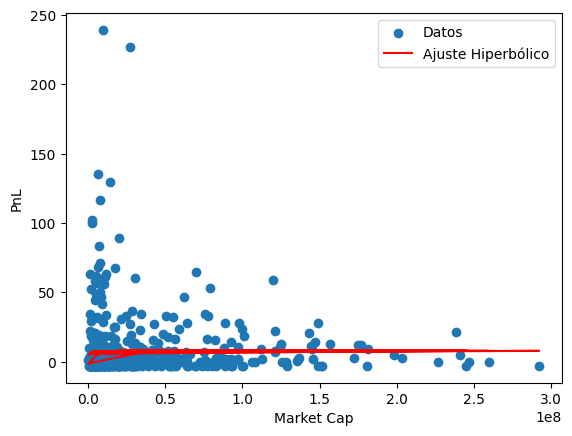

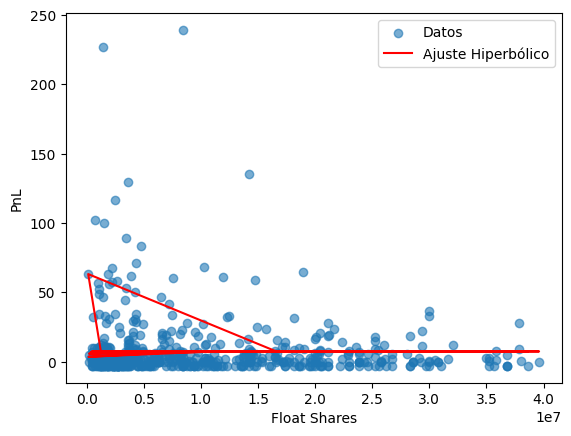

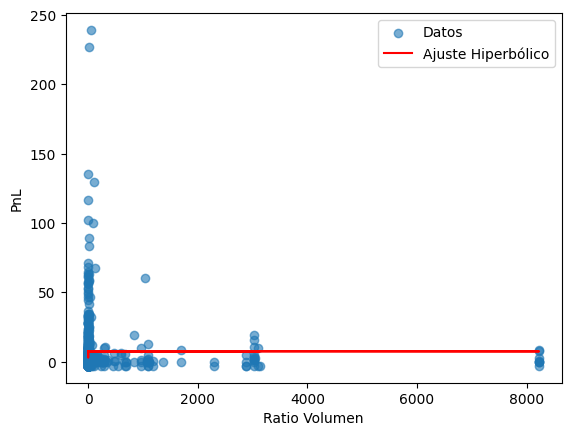

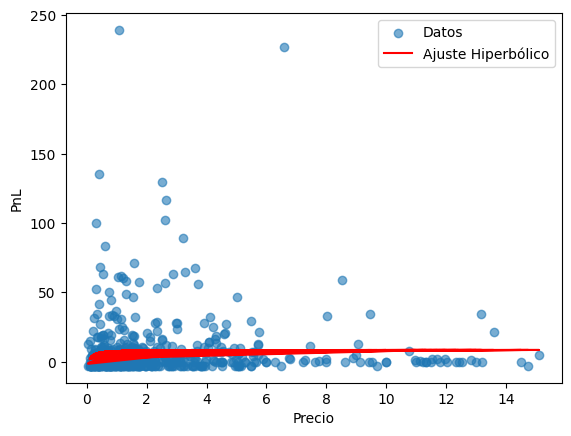

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Función hiperbólica para modelar la relación
def hiperbola(x, a, b, c):
    return a / (x + b) + c

# Cargar datos
x_data = df['market_cap'].values
y_data = df['pnl'].values

# Ajustar la función
popt, _ = curve_fit(hiperbola, x_data, y_data)

# Graficar
plt.scatter(x_data, y_data, label="Datos")
plt.plot(x_data, hiperbola(x_data, *popt), color='red', label="Ajuste Hiperbólico")
plt.xlabel("Market Cap")
plt.ylabel("PnL")
plt.legend()
plt.show()

# Datos
x_data = df['float_shares'].values
y_data = df['pnl'].values

# Ajustar la función
popt, _ = curve_fit(hiperbola, x_data, y_data, maxfev=10000)

# Graficar ajuste
plt.scatter(x_data, y_data, label="Datos", alpha=0.6)
plt.plot(x_data, hiperbola(x_data, *popt), color='red', label="Ajuste Hiperbólico")
plt.xlabel("Float Shares")
plt.ylabel("PnL")
plt.legend()
plt.show()

# Datos
x_data = df['ratio_vol'].values
y_data = df['pnl'].values

# Ajustar la función
popt, _ = curve_fit(hiperbola, x_data, y_data, maxfev=10000)

# Graficar ajuste
plt.scatter(x_data, y_data, label="Datos", alpha=0.6)
plt.plot(x_data, hiperbola(x_data, *popt), color='red', label="Ajuste Hiperbólico")
plt.xlabel("Ratio Volumen")
plt.ylabel("PnL")
plt.legend()
plt.show()

# Datos
x_data = df['precio'].values
y_data = df['pnl'].values

# Ajustar la función
popt, _ = curve_fit(hiperbola, x_data, y_data)

# Graficar ajuste
plt.scatter(x_data, y_data, label="Datos", alpha=0.6)
plt.plot(x_data, hiperbola(x_data, *popt), color='red', label="Ajuste Hiperbólico")
plt.xlabel("Precio")
plt.ylabel("PnL")
plt.legend()
plt.show()

---

# Implementacion de Walk-forward

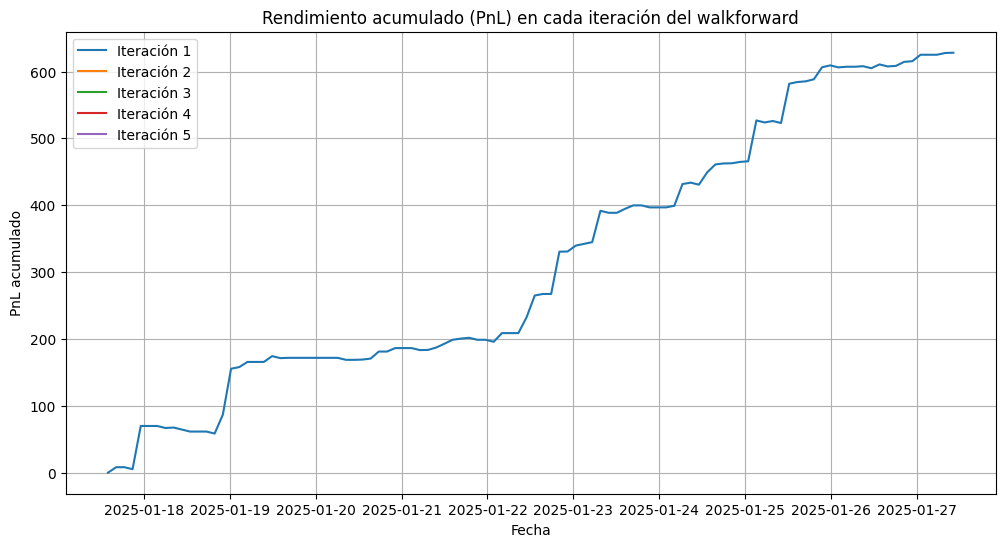

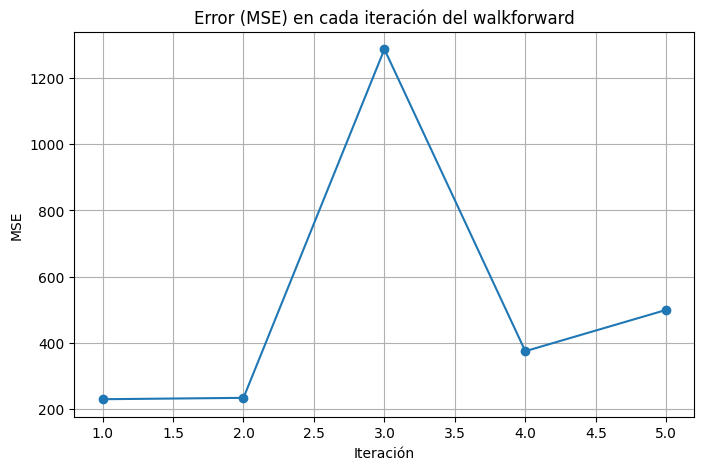

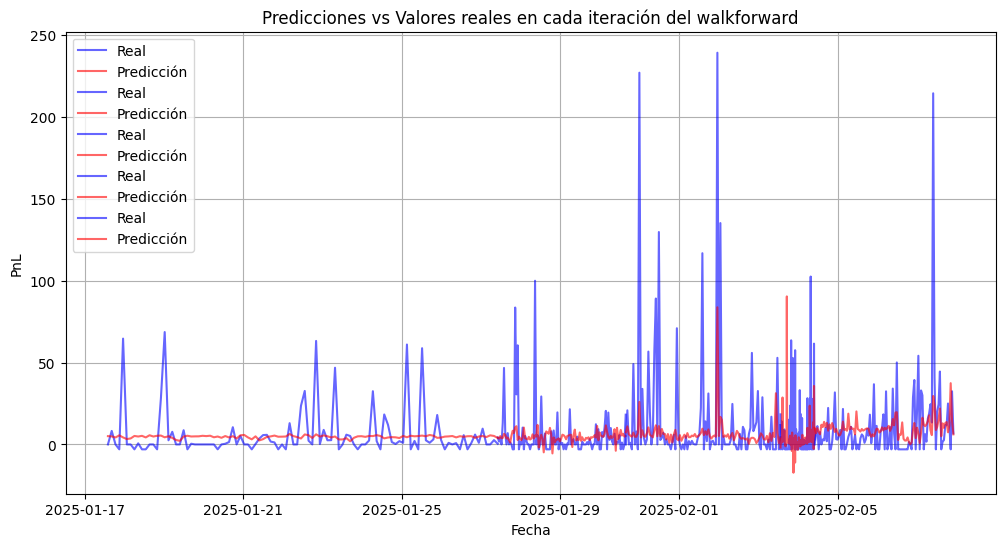

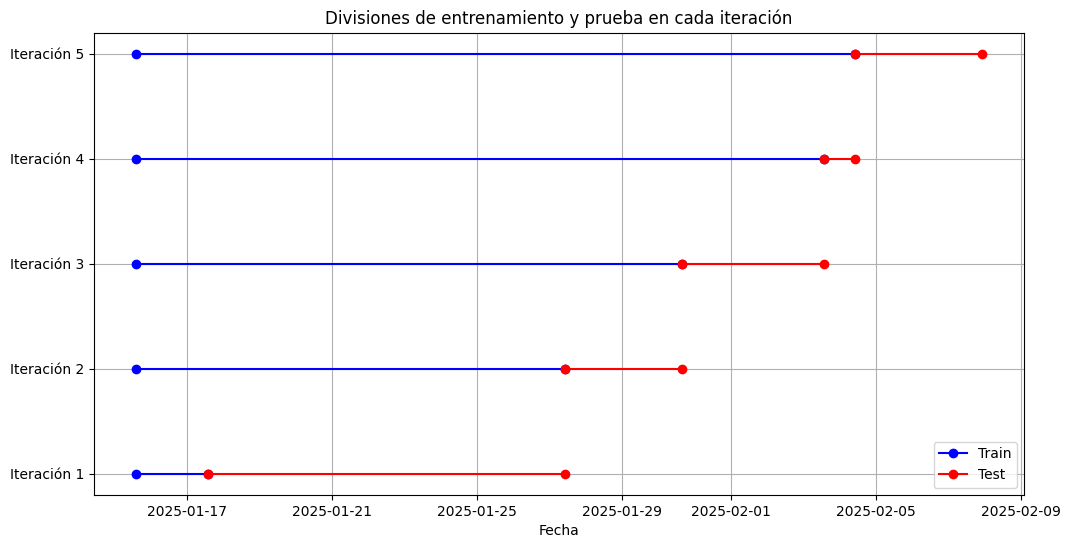

In [ ]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Supongamos que tu DataFrame se llama df

# Definir las características (X) y la variable objetivo (y)
# Aquí puedes seleccionar las columnas que consideres relevantes para tu modelo
X = df[['percent_var', 'ratio_vol', 'float_shares', 'market_cap']]  # Ejemplo de características
y = df['pnl']  # Variable objetivo

# Configurar el TimeSeriesSplit para el walkforward
n_splits = 5  # Número de divisiones para el walkforward
tscv = TimeSeriesSplit(n_splits=n_splits)

# Lista para almacenar los resultados de cada iteración
results = []

# Iterar sobre las divisiones de tiempo
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrenar un modelo (en este caso, una regresión lineal)
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular el error (por ejemplo, MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Almacenar los resultados
    results.append({
        'train_start': df.iloc[train_index[0]]['fecha'],
        'train_end': df.iloc[train_index[-1]]['fecha'],
        'test_start': df.iloc[test_index[0]]['fecha'],
        'test_end': df.iloc[test_index[-1]]['fecha'],
        'mse': mse,
        'y_test': y_test,
        'y_pred': y_pred
    })

# Gráfico 1: Rendimiento acumulado (PnL acumulado)
plt.figure(figsize=(12, 6))
cumulative_pnl = 0
for result in results:
    test_dates = pd.date_range(start=result['test_start'], end=result['test_end'], periods=len(result['y_test']))
    cumulative_pnl += result['y_test'].cumsum()
    plt.plot(test_dates, cumulative_pnl, label=f"Iteración {results.index(result) + 1}")
plt.title("Rendimiento acumulado (PnL) en cada iteración del walkforward")
plt.xlabel("Fecha")
plt.ylabel("PnL acumulado")
plt.legend()
plt.grid()
plt.show()

# Gráfico 2: Error (MSE) en cada iteración
mse_values = [result['mse'] for result in results]
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_splits + 1), mse_values, marker='o')
plt.title("Error (MSE) en cada iteración del walkforward")
plt.xlabel("Iteración")
plt.ylabel("MSE")
plt.grid()
plt.show()

# Gráfico 3: Predicciones vs Valores reales
plt.figure(figsize=(12, 6))
for result in results:
    test_dates = pd.date_range(start=result['test_start'], end=result['test_end'], periods=len(result['y_test']))
    plt.plot(test_dates, result['y_test'], label="Real", color='blue', alpha=0.6)
    plt.plot(test_dates, result['y_pred'], label="Predicción", color='red', alpha=0.6)
plt.title("Predicciones vs Valores reales en cada iteración del walkforward")
plt.xlabel("Fecha")
plt.ylabel("PnL")
plt.legend()
plt.grid()
plt.show()

# Gráfico 4: Splits temporales
plt.figure(figsize=(12, 6))
for i, result in enumerate(results):
    plt.plot([result['train_start'], result['train_end']], [i, i], marker='o', color='blue', label="Train" if i == 0 else "")
    plt.plot([result['test_start'], result['test_end']], [i, i], marker='o', color='red', label="Test" if i == 0 else "")
plt.yticks(range(n_splits), [f"Iteración {i+1}" for i in range(n_splits)])
plt.title("Divisiones de entrenamiento y prueba en cada iteración")
plt.xlabel("Fecha")
plt.legend()
plt.grid()
plt.show()